
# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will analyze the medical appointments of no shows dataset. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

This dataset has 14 charactaristics about the patient as PatientID, AppoitmentID, Gender, Scheduled Day, Appointment Day, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_Received and No_Show.


Below the questions that can help us to explore the dataset:


* **Question 1** : What is the effect of the interval between Sceduled day and appointment day on the patient's show up ?
* **Question 2** : How does Receiving an SMS have an effect on the patient's show up ?
* **Question 3** : Does the gender type affect the patient's show up ? 
* **Question 4** : Does the age affect the patient's show up ?
* **Question 5** : How Scholarsip affect the patient's show up ?
* **Question 6** : How does the neigbourhood affect the patient's show up ?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette())
%matplotlib inline

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Loading data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Exploring data types and No-Null Rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Make a quick view on its statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Checking Handicap Column
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [5]:
#Checking the null rows
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#Checking the duplicated columns
df.duplicated().sum()

0

### Data Cleaning
**Data Quality and Structure synthesis:**
* Dropping unimportant Data as (PatientID, AppointmentID)
* Typo's in colum's name should be corrected
* Converting some columns' types to the correct ones
* Deleting outliers and wrong data

In [8]:
#Dropping unimportant Data
df.drop(['PatientId','AppointmentID'], axis=1,inplace=True)

In [9]:
# Rewriting and correcting the columns' names for easily reading
df.columns = df.columns.str.lower()
df.rename(columns = {'scheduledday':'scheduled_day','appointmentday':'appointment_day','hipertension':'hypertension','handcap':'handicap','no-show':'no_show'},inplace=True)

In [10]:
#Converting the scheduled_day & appointment_day to date format
index = ['scheduled_day','appointment_day']
for col in index:
    df[col] = df[col].apply(lambda x:x.split('T')[0])
    df[col] = pd.to_datetime(df[col])

In [11]:
# Creating a new column that calculating the time span from the scheduling date till the appointment date
df['time_span'] = (df['appointment_day']- df['scheduled_day']).dt.days

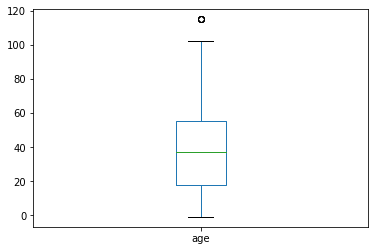

In [12]:
df.age.plot(kind='box');
outliers_rows = df.query('age < 0  | age == 115')
df.drop(index =outliers_rows.index,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110521 non-null  object        
 1   scheduled_day    110521 non-null  datetime64[ns]
 2   appointment_day  110521 non-null  datetime64[ns]
 3   age              110521 non-null  int64         
 4   neighbourhood    110521 non-null  object        
 5   scholarship      110521 non-null  int64         
 6   hypertension     110521 non-null  int64         
 7   diabetes         110521 non-null  int64         
 8   alcoholism       110521 non-null  int64         
 9   handicap         110521 non-null  int64         
 10  sms_received     110521 non-null  int64         
 11  no_show          110521 non-null  object        
 12  time_span        110521 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.8+ MB


In [14]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,time_span
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034,10.183721
std,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876,15.255082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


The time_span shows that there are some negative values, so we will remove them

In [16]:
#Deleting Wrong Dates which have scheduled dates after appointment dates
wrong_dates = df[df['time_span'] < 0]
df.drop(index=wrong_dates.index,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

**Making a correlation heat map** \
First things first, converting no_show and gender to zeros and ones to be shown on the correlation heat map

In [18]:
# converting categorized columns like no_show and gender to zeros and ones
def zeros_ones(dataFrame, col):
    """
    This function converts a dataframe's column with 2 values into zeros and ones.
    
    Key Arguments:
    dataFrame   -- a Dataframe 
    col -- column name 
    """
    dataFrame[col].replace({dataFrame[col].unique()[0]:0, dataFrame[col].unique()[1]:1}, inplace=True)
    
# making a copy of the Dataframe for correlation heatmap 
df_corr = df.copy()

# converting no_show and gender to zeros and ones
zeros_ones(df_corr, 'no_show')
zeros_ones(df_corr, 'gender')

In [20]:
df_corr.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_span
0,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


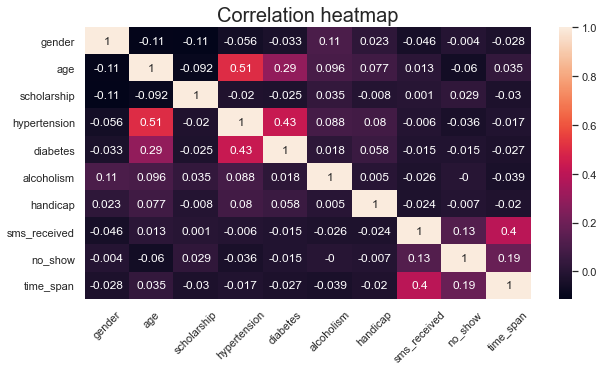

In [134]:
#plotting correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df_corr.corr().round(3), annot = True)
plt.title('Correlation heatmap', size='20')
plt.xticks(rotation='45');

Regarding the heat map, most of the data collected don't have a correlation with the target variable.However, we can extract the most correlated factors which have a slight correlation with the target variable which are:
*  **SMS_Received**
* **Time Span** which is the intereval between the scheduled date and the appointment date

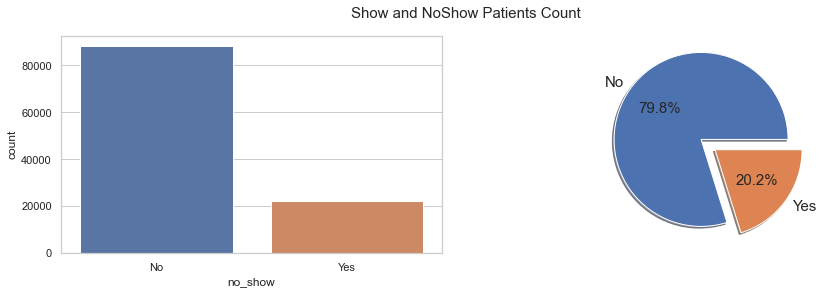

In [34]:
# Plotting the show and no_show Data
plt.figure(figsize=(15,4))
plt.subplot(121)
ax = sns.countplot(x=df.no_show, data=df);
plt.subplot(122)
df['no_show'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=15,labels=['No','Yes'],explode=(0.1,0.1),shadow=True);
plt.axis('off');
plt.suptitle('Show and NoShow Patients Count', fontsize=15);

As we see the percentage of patients who didn't show up to the appointments, is 20.2%. \
Let's start to explore why they didn't show up.

### Research Question 1 (What is the effect of the time span on the patient's show up ?)

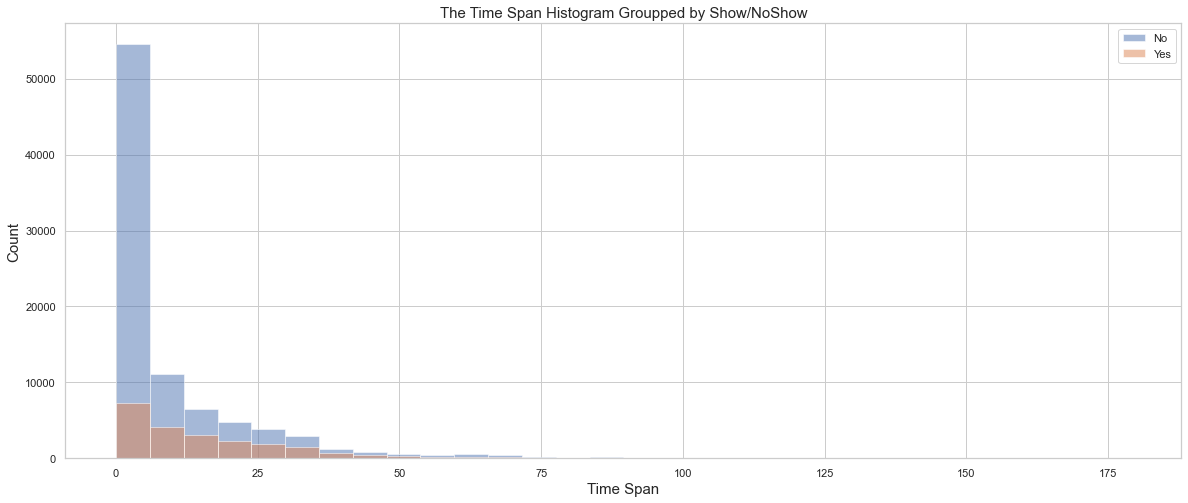

In [96]:
# Plot the distribution of time span groupped by no_show
plt.figure(figsize=(20,8))
df.groupby('no_show').time_span.hist(bins=30,alpha=0.5);
plt.title('The Time Span Histogram Groupped by Show/NoShow',fontsize=15)
plt.legend(df.no_show.unique());
plt.ylabel('Count',fontsize=15);
plt.xlabel('Time Span',fontsize=15);

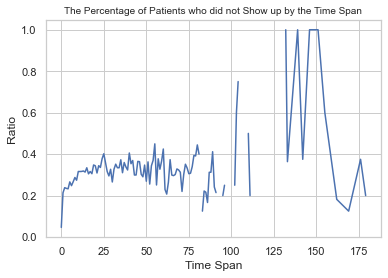

In [98]:
#Getting the Percentage of NoShow related to time span
ratio = df[df.no_show == 'Yes'].groupby('time_span').size()/df.groupby('time_span').size()
ratio.plot(kind='line');
plt.title('The Percentage of Patients who did not Show up by the Time Span',fontsize=10);
plt.ylabel('Ratio');
plt.xlabel('Time Span');

Regarding the figure, it shows that the precentage of no-show appointments increases with the increasing of the time span.

### Research Question 2  (How does Receiving an SMS have an effect on the patient's show up?)

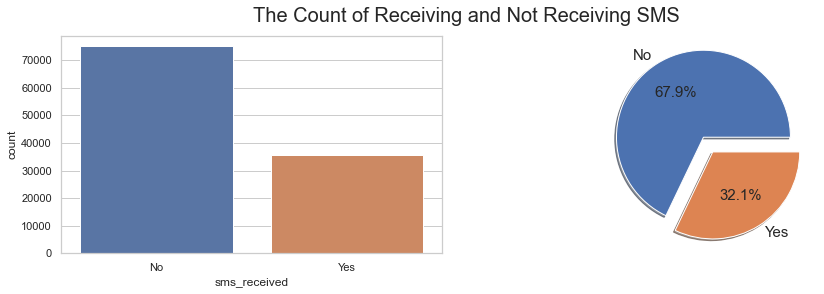

In [116]:
#plotting the recevied and not recevied SMS
plt.figure(figsize=(15,4))
plt.subplot(121)
ax = sns.countplot(x=df.sms_received, data=df)
ax.set_xticklabels(['No','Yes']);
plt.subplot(122)
df['sms_received'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=15,labels=['No','Yes'],explode=(0.1,0.1),shadow=True);
plt.suptitle('The Count of Receiving and Not Receiving SMS',fontsize=20)
plt.axis('off');

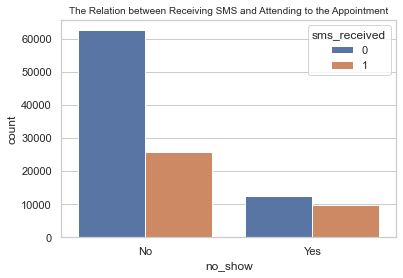

In [100]:
#Plotting the relation between receiving SMS and showing up to the appointment
ax = sns.countplot(x= df['no_show'], hue=df['sms_received'])
ax.set_title('The Relation between Receiving SMS and Attending to the Appointment',fontsize=10);

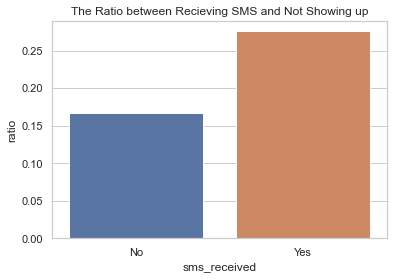

In [101]:
# Plotting the ratio between Patients who didn't show up and sms receiving.
ratio = df[df['no_show']=='Yes'].groupby('sms_received').size()/df.groupby('sms_received').size()
ax = sns.barplot(x=ratio.index, y=ratio);
ax.set_title("The Ratio between Recieving SMS and Not Showing up");
ax.set_xticklabels(['No','Yes']);
plt.ylabel('ratio');

Nearly 27% of people who received the SMS didn't show up.\
Regarding to the heat map matrix, there is a correlation between sms_received and time_span, so this percentage may depend on the time span. Let's check.

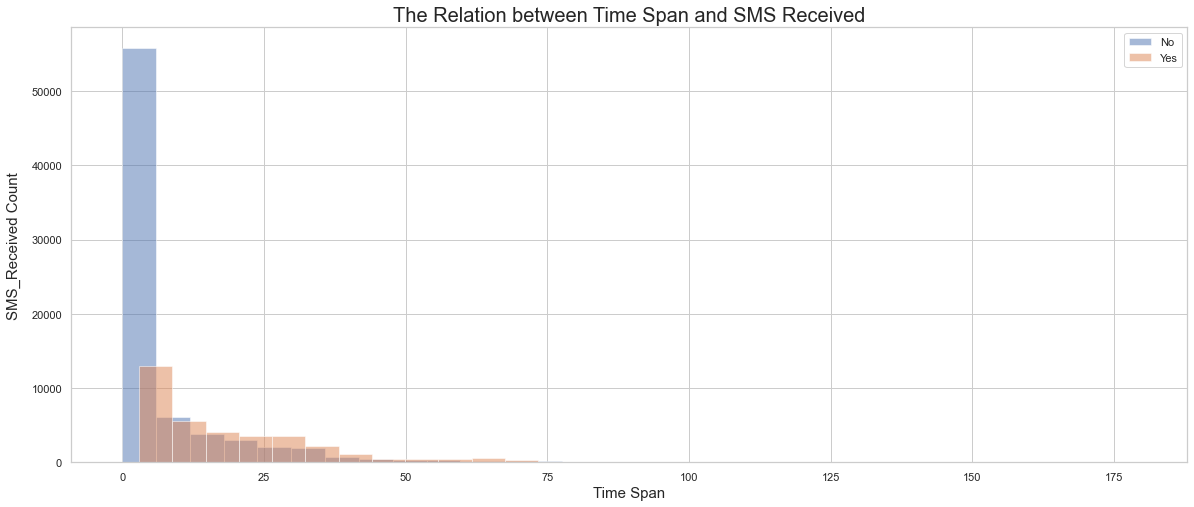

In [102]:
# Plotting the relation between time span and SMS received
plt.figure(figsize=(20,8))
df.groupby('sms_received').time_span.hist(bins=30,alpha=0.5);
plt.xlabel('Time Span',fontsize=15);
plt.ylabel('SMS_Received Count',labelpad=10,fontsize=15);
plt.legend(['No','Yes']);
plt.title('The Relation between Time Span and SMS Received',fontsize=20);

The people who received SMS have a longer time span, That's why there are a correlation between time span, sms_recevied and not showing up.

### Research Question 3  (Does the gender type affect the patient's show up ?)

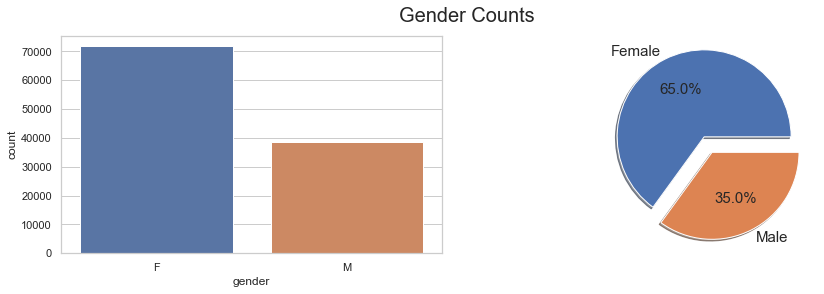

In [91]:
#Plotting the number of genders in the dataset
plt.figure(figsize=(15,4))
plt.subplot(121)
ax = sns.countplot(x=df['gender'], data = df);
plt.subplot(122)
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=15,labels=['Female','Male'],explode=(0.1,0.1),shadow=True);
plt.suptitle('Gender Counts',fontsize=20)
plt.axis('off');

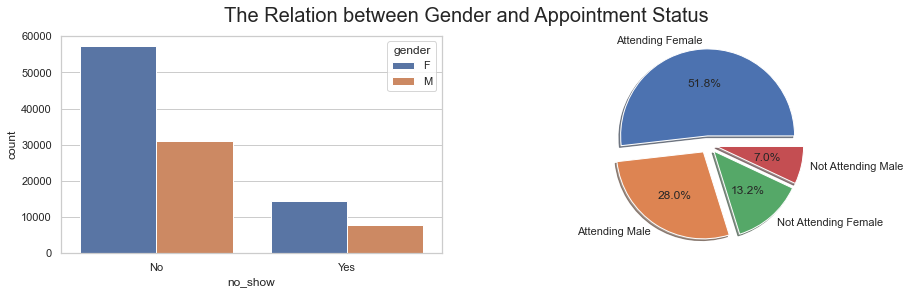

In [119]:
plt.figure(figsize=(15,4))
plt.subplot(121)

#plotting the Relation between gender and Not Showing/Showing Up
ax = sns.countplot(x=df['no_show'], hue=df['gender']);

plt.subplot(122)
#Plotting The Percentages of genders in relation to the appointment status
df.groupby('no_show').gender.value_counts().plot.pie(shadow=True,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1),labels=['Attending Female','Attending Male','Not Attending Female','Not Attending Male']);
plt.axis('off');
plt.suptitle('The Relation between Gender and Appointment Status',fontsize=20);

I think there is no effect of gender on appointment status as they are the same ratio in both gender.

### Research Question 4  ( Does the age affect the patient's show up ?)

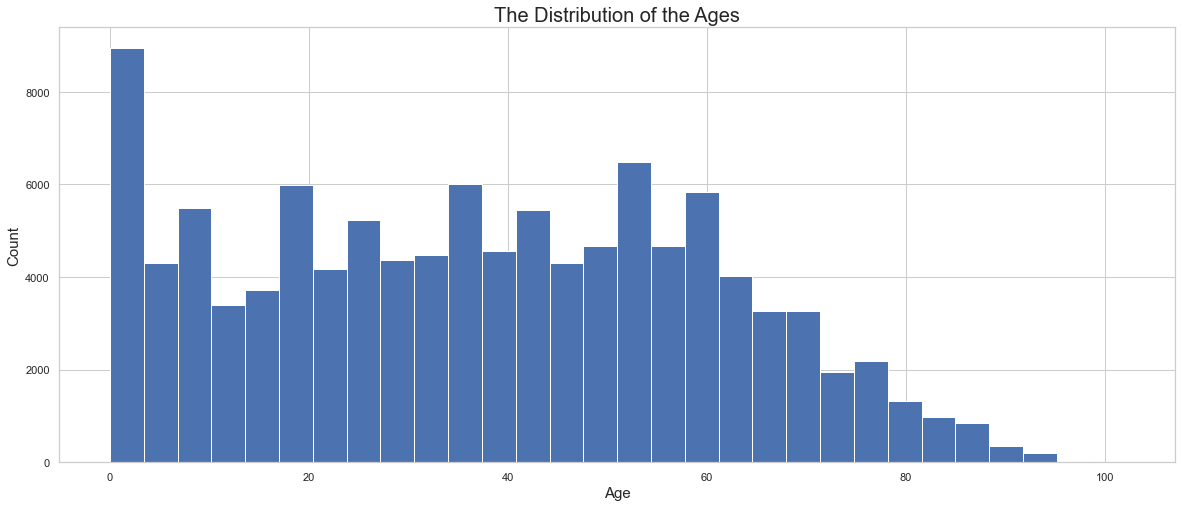

In [110]:
#Plotting the age distribution
plt.figure(figsize=(20,8))
df.age.hist(bins=30)
plt.title('The Distribution of the Ages',fontsize=20);
plt.xlabel('Age',fontsize=15);
plt.ylabel('Count',fontsize=15);

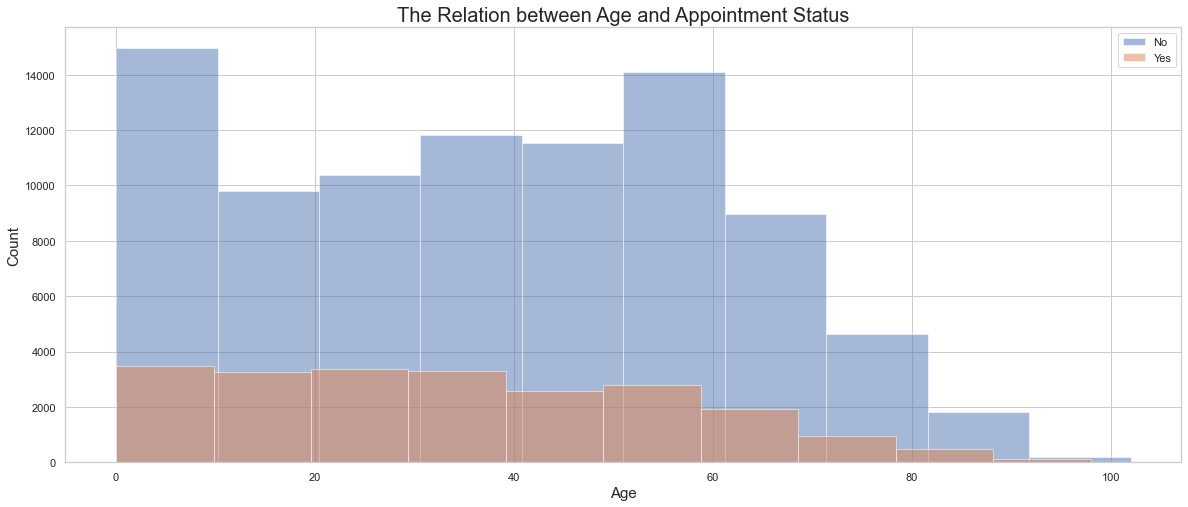

In [127]:
# Plotting the relation between the age and the appointment status
plt.figure(figsize=(20,8));
df.groupby('no_show').age.hist(alpha=0.5);
plt.legend(df.no_show.unique());
plt.title('The Relation between Age and Appointment Status', fontsize=20)
plt.xlabel('Age',fontsize=15);
plt.ylabel('Count',fontsize=15);

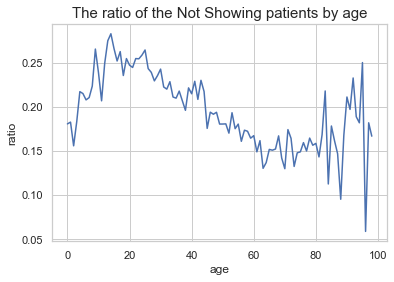

In [121]:
#Plotting the ratio of the Not Showing patients by age
ratio = df[df['no_show']=='Yes'].groupby('age').size()/df.groupby('age').size()
ratio.plot();
plt.ylabel('ratio');
plt.title('The ratio of the Not Showing patients by age',fontsize=15);

There is a slight negative correlation between the appointment status and the age at the ages between 20 to 80, although there is a slight positive correlation between them at the ages between (0-20) and +80.  

On the other hand, there are correlations between the age, hypertension and diabetes regarding the correlation heat map. So, let's check if these factors have an effect on the negative and positive correlations above or not.

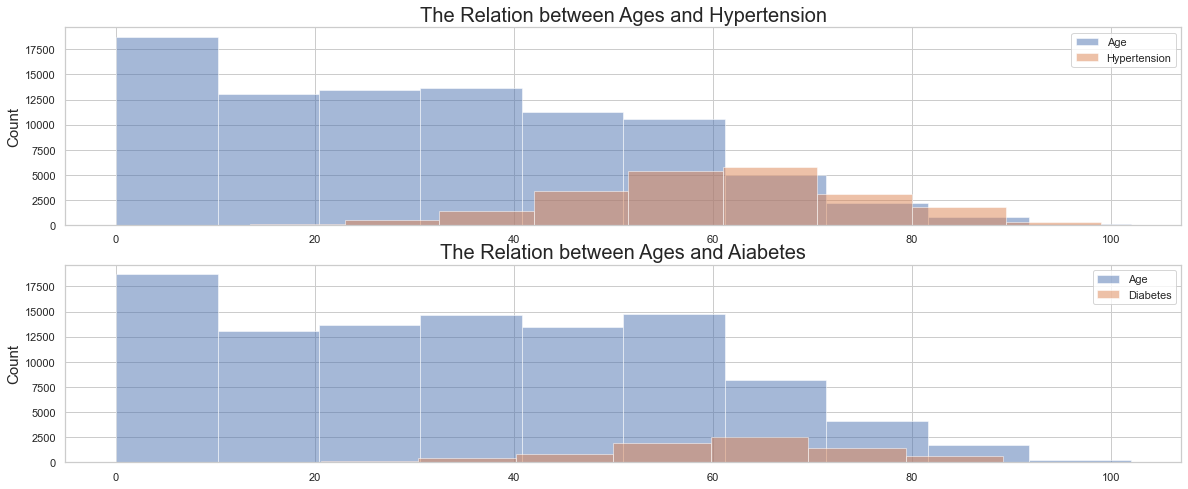

In [128]:
#Plotting the relation between the hypertension and ages
plt.figure(figsize=(20,8))
ax1= plt.subplot(211)
df.groupby('hypertension').age.hist(alpha=0.5);
plt.title('The Relation between Ages and Hypertension', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.legend(['Age','Hypertension'])
#Plotting the relation between the diabetes and ages
ax2=plt.subplot(212)
df.groupby('diabetes').age.hist(alpha=0.5);
plt.title('The Relation between Ages and Aiabetes', fontsize=20);
plt.ylabel('Count', fontsize=15);
plt.legend(['Age','Diabetes']);

As shown above the percentage of people who suffered from diabetes and hypertension increases in the ages (20-80) and decreases at +80, That's why the percentage of people who didn't show up to the appointments decreases at the ages (20-80) and increase at +80.

### Research Question 5  (How Scholarsip affect the patient's show up ?)

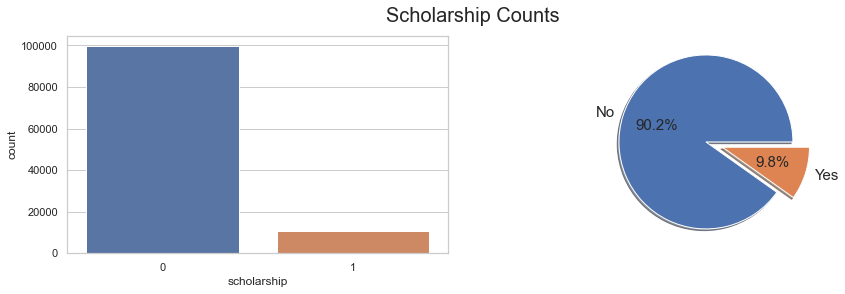

In [131]:
#plotting the distribution of scholarship
plt.figure(figsize=(15,4))
plt.subplot(121)
ax = sns.countplot(x=df['scholarship'], data = df);
plt.subplot(122)
df['scholarship'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=15,explode=(0.1,0.1),labels=['No','Yes'],shadow=True);
plt.suptitle('Scholarship Counts',fontsize=20)
plt.axis('');

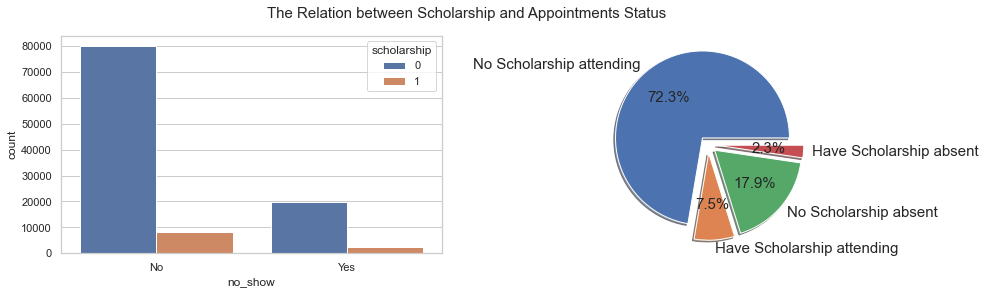

In [133]:
# plotting the relation between scholarship and appointments status
plt.figure(figsize=(15,4))
plt.subplot(121)
ax = sns.countplot(x=df['no_show'], hue=df['scholarship'])
plt.subplot(122)
df.groupby('no_show').scholarship.value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=15,explode=(0.1,0.1,0.1,0.1),shadow=True,labels=['No Scholarship attending','Have Scholarship attending','No Scholarship absent','Have Scholarship absent']);
plt.suptitle('The Relation between Scholarship and Appointments Status',fontsize=15)
plt.axis('off');


It seems that not having a scholarship increases the possibility to attend the appoitment.

### Research Question 6  (How does the neigbourhood affect the patient's show up ?)

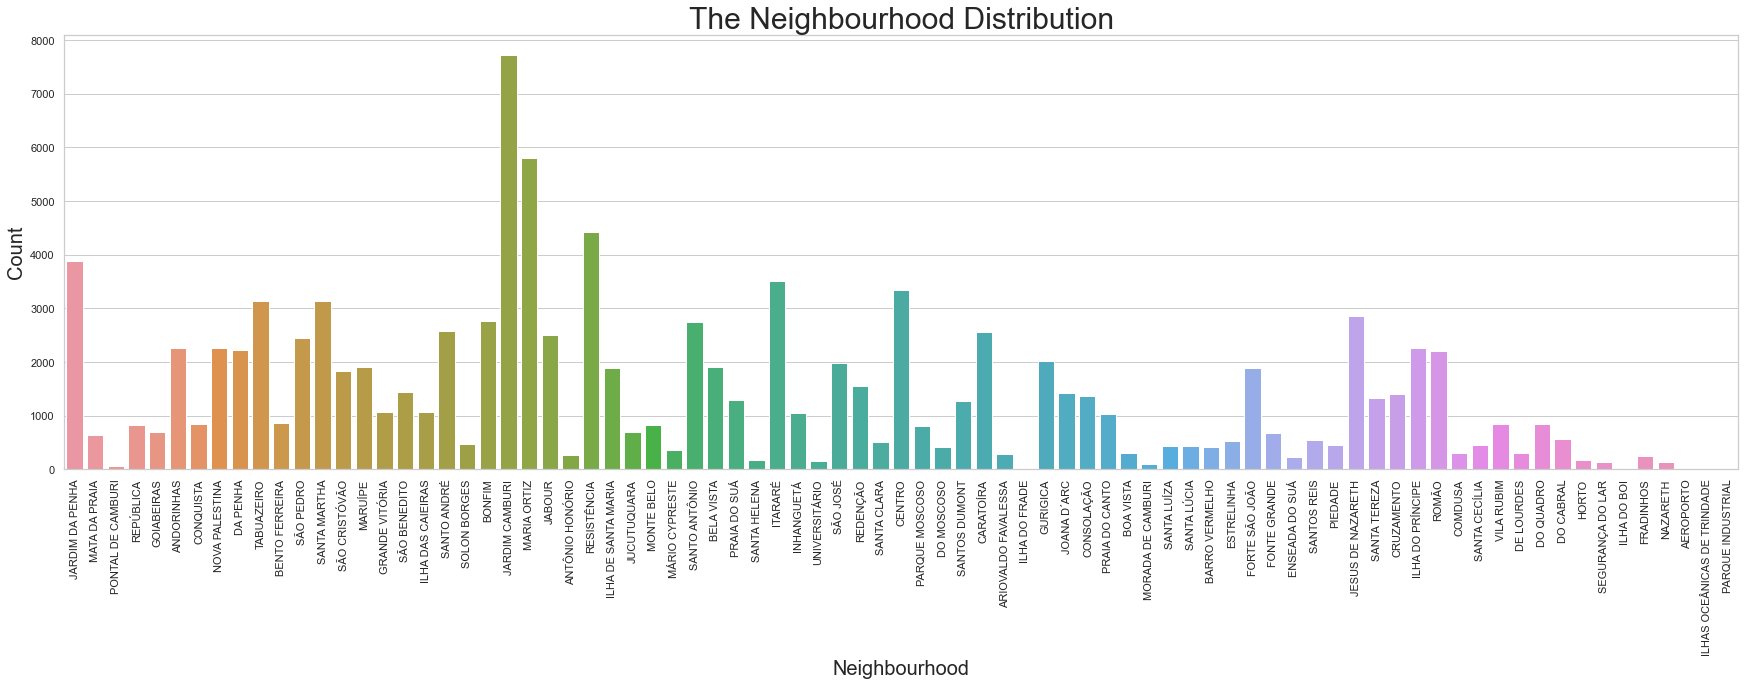

In [135]:
#Plotting the distribution of all locations
plt.figure(figsize=(30,8))
ax = sns.countplot(x= df['neighbourhood'], data=df);
plt.xticks(rotation=90);
plt.title('The Neighbourhood Distribution',fontsize=30);
plt.xlabel('Neighbourhood',fontsize=20);
plt.ylabel('Count',fontsize=20);

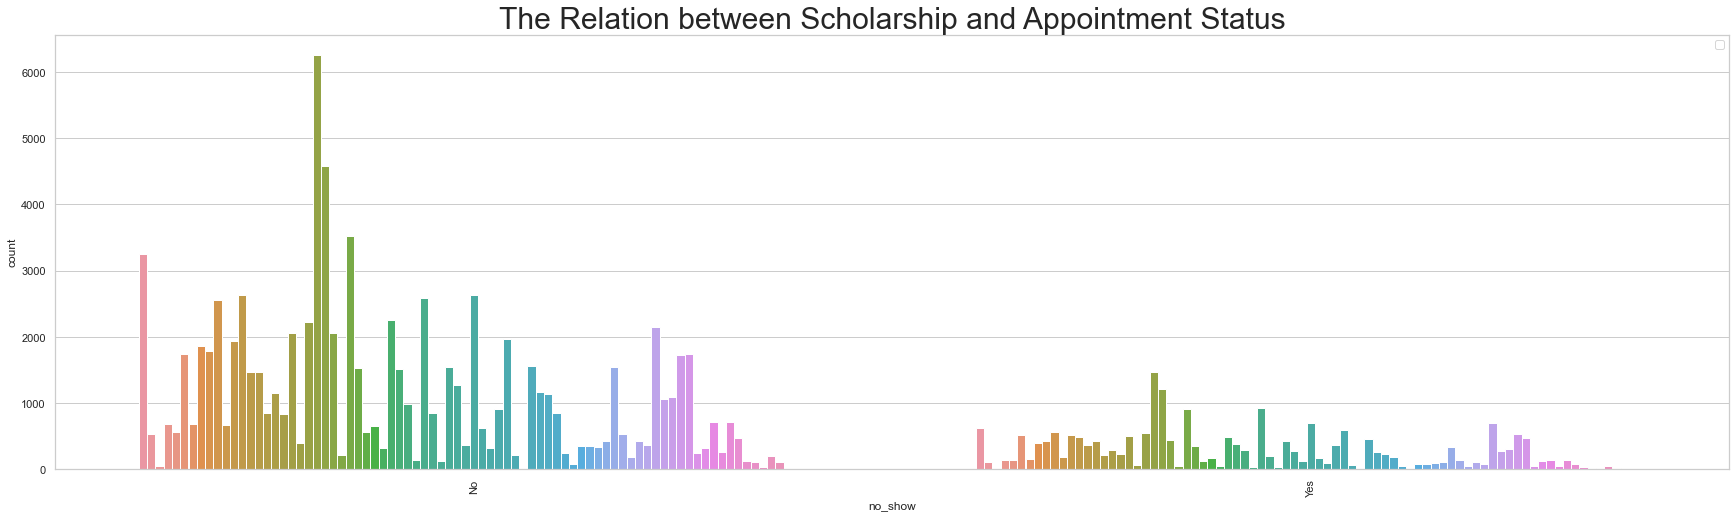

In [137]:
#Plotting the relation between Scholarship and appointment status
plt.figure(figsize=(30,8))
ax = sns.countplot(x= df['no_show'], hue=df['neighbourhood']);
plt.xticks(rotation=90);
plt.title('The Relation between Scholarship and Appointment Status',fontsize=30);
plt.legend('');

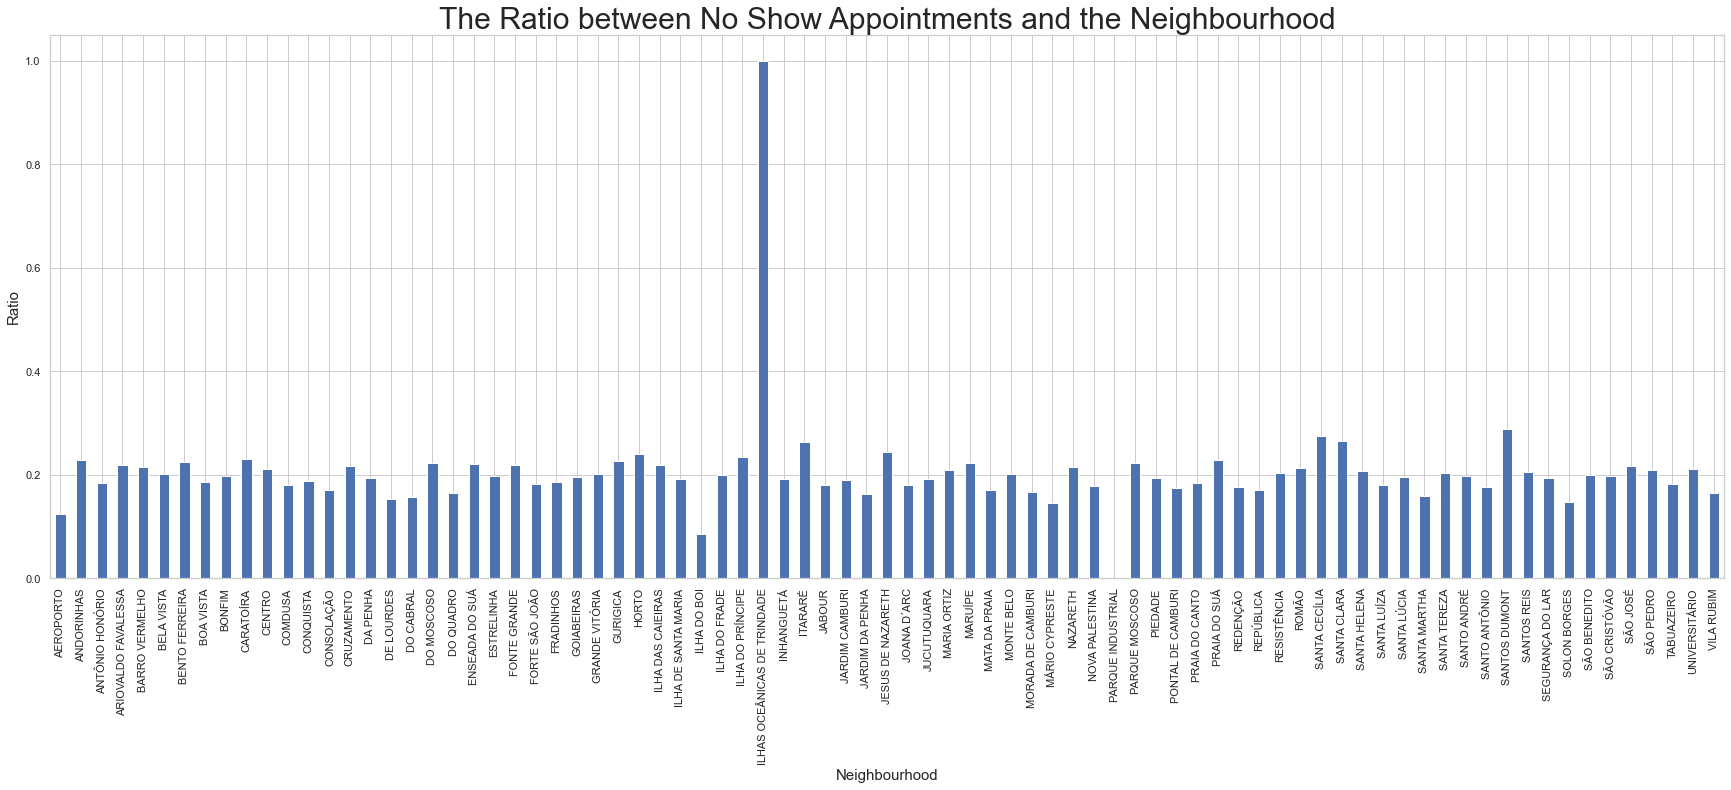

In [139]:
#Plotting The ratio between no show appointments and the neighbourhood
ratio = df[df['no_show']=='Yes'].groupby('neighbourhood').size()/df.groupby('neighbourhood').size()
plt.figure(figsize=(30,10))
ratio.plot(kind='bar');
plt.xticks(rotation=90);
plt.title('The Ratio between No Show Appointments and the Neighbourhood',fontsize=30);
plt.xlabel('Neighbourhood',fontsize=15);
plt.ylabel('Ratio',fontsize=15);

In [140]:
ratio.sort_values(ascending=False)
print(df[df['neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE'].value_counts().sum())
print(df[df['neighbourhood']=='PARQUE INDUSTRIAL'].value_counts().sum())

2
1


The ratio is nearly the same between neighbourhoods, also we can neglect the two neighbourhoods above as they affect badly on the diagram, besides they don't have many records to have an insight

In [141]:
deleted_rows = df.query('neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE" | neighbourhood== "PARQUE INDUSTRIAL" ')
df.drop(index = deleted_rows.index,inplace=True)

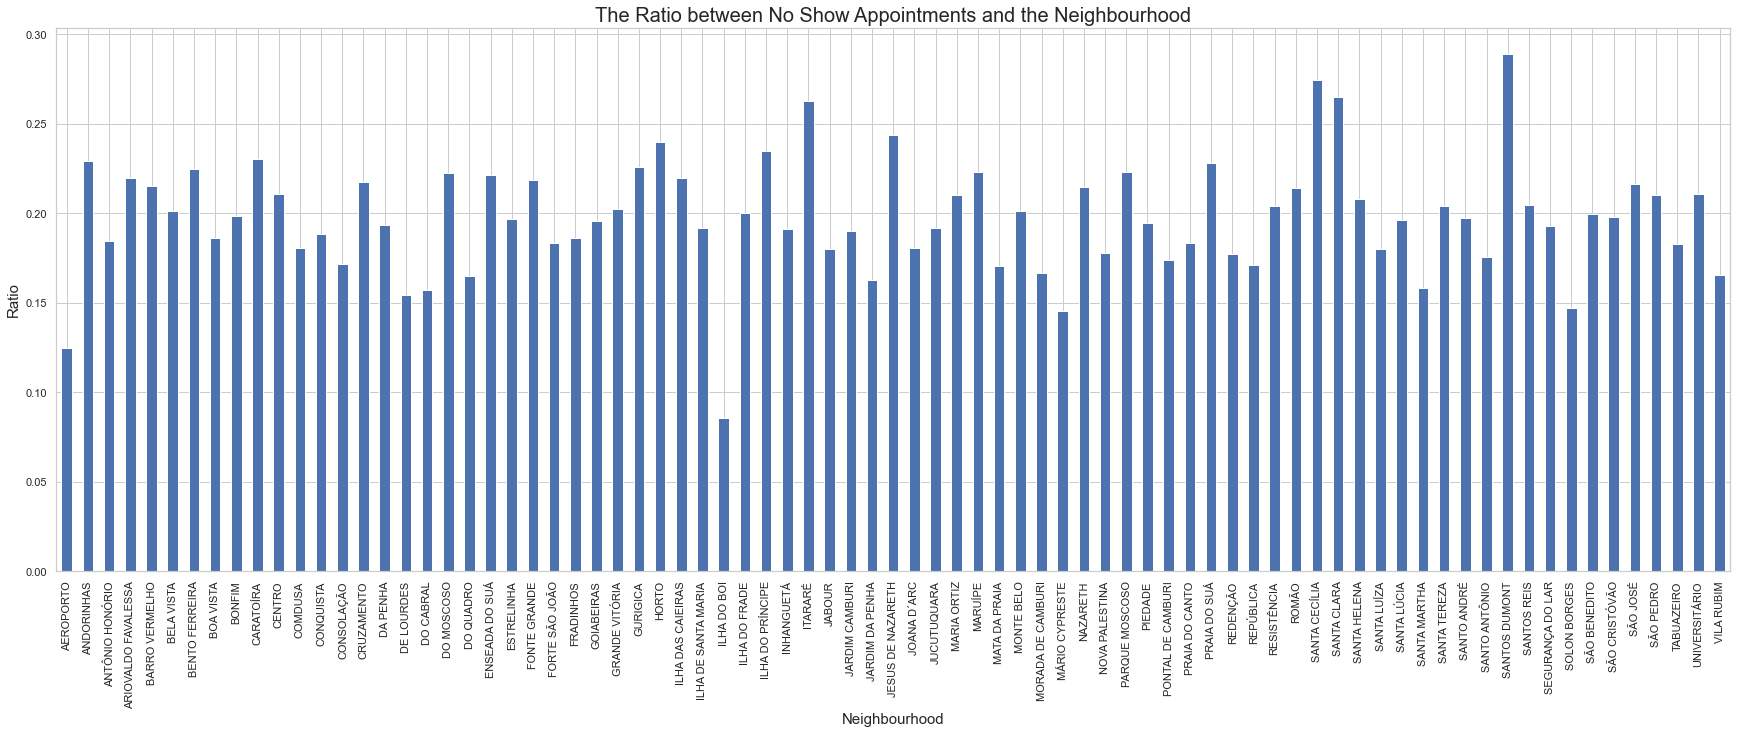

In [144]:
#Plotting The ratio between no show appointments and the neighbourhood
ratio = df[df['no_show']=='Yes'].groupby('neighbourhood').size()/df.groupby('neighbourhood').size()
plt.figure(figsize=(30,10))
ratio.plot(kind='bar');
plt.xticks(rotation=90);
plt.title('The Ratio between No Show Appointments and the Neighbourhood',fontsize=20);
plt.xlabel('Neighbourhood',fontsize=15);
plt.ylabel('Ratio',fontsize=15);

<a id='conclusions'></a>
## Conclusions

* Time Span between the scheduling day and the appointment day and receiving SMS affect the patient's showing up. As we noticed above, the long difference between the two day and not receiving the SMS reminder leads to not show up of patient to their appointments.

* The gender didn't affect the patient's showing up as the percentage of showing and no showing females is nearly the same percentage of showing and no showing males

* The age and the diseases (diabetes, hypertension) affect the patient's showing up. As we noticed the patients with ages between (20-80) years didn't show up less than the patients with ages between (0-20) and +80 years. This decreasing depends on that the patients with (20-80) years have diabetes and hypertension more than others.

* Most of patients who didn't have scholarship showed up to the appointments more than those who had, but I think the opposit would be more realistic.

* The neighbourhood doesn't affect on the patient's show up. As we noticed nearly all neighbourhoods have the same ratio of not showing up.


## Limitations
* Needing more indicators to explore why the patients who didn't have scholarship, showed up more than others.

* If there are some factors as how far are the patients live from their healthcare facilities and their financial status, they will help much.

* Balancing the number of patients in each category of handicap will help in exploration.

## References
* https://matplotlib.org/
* https://seaborn.pydata.org/